In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from main import Sequential, Dense, accuracy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_data.csv")

In [3]:
X = data.drop(columns=['label'])
y = data['label']
y = pd.get_dummies(y)
X  = X/255.0
X = X.to_numpy()
y = y.to_numpy().astype(np.float32)

X, X_test, y, y_test = train_test_split(X, y, train_size=0.3)


In [4]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:

model = Sequential([
    Dense(16),
    Dense(16),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_cross_entropy')

In [29]:
(train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X, y, epochs=150, learning_rate=0.01, X_test=X_test, y_test=y_test)

Epoch: 1, time taken: 0.47498273849487305, accuracy=0.4328733079526227, sparse_categorical_cross_entropy loss=1.779574742829398
Epoch: 2, time taken: 0.624701738357544, accuracy=0.714493443316413, sparse_categorical_cross_entropy loss=0.9289820818889071
Epoch: 3, time taken: 0.5951306819915771, accuracy=0.8187394247038917, sparse_categorical_cross_entropy loss=0.6304433939196258
Epoch: 4, time taken: 0.5523459911346436, accuracy=0.8568898054145515, sparse_categorical_cross_entropy loss=0.5065561708286198
Epoch: 5, time taken: 0.5855162143707275, accuracy=0.8729113790186125, sparse_categorical_cross_entropy loss=0.44640470192749293
Epoch: 6, time taken: 0.5402300357818604, accuracy=0.8835395516074449, sparse_categorical_cross_entropy loss=0.41074645166538215
Epoch: 7, time taken: 0.5728456974029541, accuracy=0.8907043147208121, sparse_categorical_cross_entropy loss=0.38369911593008493
Epoch: 8, time taken: 0.5684659481048584, accuracy=0.8949608714043993, sparse_categorical_cross_entropy

In [38]:
# A = model.pre
y_pred = model.predict(X_test)
y_pred.shape
y_pred
temp = np.zeros_like(y_pred)
temp[np.arange(y_pred.shape[0]),np.argmax(y_pred, axis=1)] = True
accuracy(temp, y_test)



np.float64(0.9284013605442177)

0.9335714285714286
49


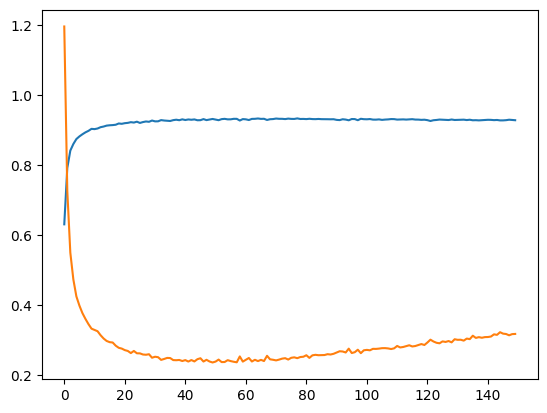

In [40]:
print(np.max(test_accuracy))
print(np.argmin(test_loss))
plt.plot(test_accuracy)
plt.plot(test_loss)

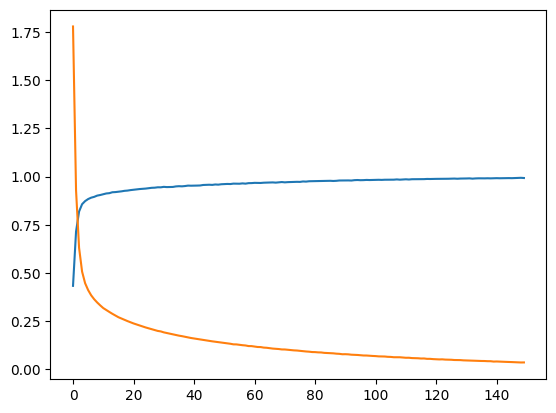

In [43]:
plt.plot(train_accuracy)
plt.plot(train_loss)

In [9]:
# import tensorflow as tf
X.shape

(12600, 784)

In [10]:
# tfmodel = tf.keras.Sequential([
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# tfmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

In [11]:
# tfmodel.fit(X, y, epochs=10)